anagrams, anscombe, attention, brain_networks, car_crashes*, diamonds*, dots, exercise*, flights, fmri, gammas, geyser, iris*, mpg*, penguins*, planets, taxis*, tips*, titanic*

In [1]:
import seaborn as sns
import squarify 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
data = sns.load_dataset('penguins')
data.head() 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True)
data['sex'].fillna(data['sex'].value_counts().index[0], inplace=True)
data.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [ ]:
#Options are below for plots using Seaborn. Examples in following blocks.
'''
(data, kind, x, y, style, col, size, ci, row, hue, palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)
viz = sns.relplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    data=data.query(use " " and/or),    #Want to slice out any part of it for this viz?     
    kind = "line",                      #Plot type [relplot (line, scatter), catplot (strip, box, violin, boxen, point, bar, count, swarm)
                                        displot (hist, kde, ecdf), lmplot, regplot, residplot, heatmap, clustermap]
    x = "flipper_length_mm",            #What is your X
    y = "bill_length_mm",               #What is your Y   
    style = ,                           #Similar to hue, set marker style based on category
    col = "species",                    #Want to break out into small multiples vertically?    
    size = ,                            #Automatically normalized into ranges, size of marker or line by value
    ci = "sd",                          #Confidence interval for line plots ["none", "sd"]    
    row = ,                             #Use row with or instead of col    
    hue = "sex",                        #Want to color by a 3rd feature? Lineplot shows multiple lines. Or,    
    palette = {" " : " ", " " : " "}    #Want to specify colors for each category?
    order = [" ", " "],                 #Order your categories explicitly, or data = data.sort_values("feature")
    orient = "h",                       #Want to swap x and y?     
    height = , aspect = ,               #Want to set the height and width?    
    markers = ["^", "o"],               #Want some cool markers?
    linestyles = ["--"]                 #Want some cool linestyles? Line plot shows multiple lines.
    split = True,                       #Use to split violin plot into two hues
    inner = "stick"                     #Use to add value markers inside violin plot
    col_wrap = 5                        #Wraps values in small multiples of 5 columns, across many values    
    )

viz.set_axis_labels("Flipper length", "Bill length")
viz.set(xscale = "log")                 #Use to convert x to log scale
viz.figure.autofmt_xdate()              #Use when plotting time series, to format date
viz2 = sns.type(args, ax = viz.ax)      #Use to add a second type of plot to the same axis
'''
;

[Text(0.5, 0, 'body mass'), Text(0, 0.5, 'island')]

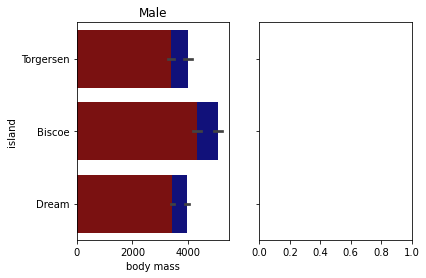

In [9]:
#PYRAMID BAR - 
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True)
sns.barplot(x = "body_mass_g", y = "island", color = "darkblue", ax = ax[0], data = data[(data.sex == "Male")])
sns.barplot(x = "body_mass_g", y = "island", color = "darkred", ax = ax[0], data = data[(data.sex == "Female")])
#ax[0].invert_xaxis()
#ax[1].yaxis.tick_right()
ax[0].set_title("Male")
#ax[1].set_title("Female")
ax[0].set(xlabel="body mass", ylabel="island") 
#ax[1].set(xlabel="body mass", ylabel="")
#fig.suptitle("Penguins")

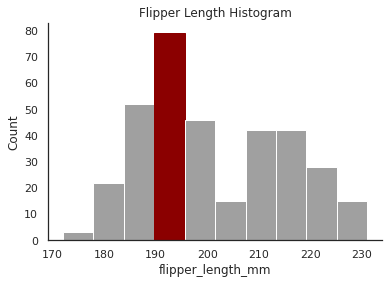

In [10]:
#HISTOGRAM comparison- 
sns.set_theme(style="white", rc={"axes.spines.right" : False, "axes.spines.top" : False}, font="DejaVu Sans")
ax = sns.histplot(x = "flipper_length_mm", color = "gray", data = data)
heights = [p.get_height() for p in ax.patches]
highest = sorted(heights)[len(heights)-1]
for p in ax.patches:
    if  p.get_height() == highest:
        p.set_color('darkred')
plt.title("Flipper Length Histogram")
plt.show()

Text(0.5, 0.98, 'Flipper Length')

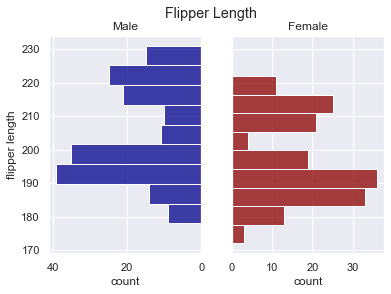

In [30]:
#HISTOGRAM comparison- 
fig, ax = plt.subplots(ncols=2, nrows=1, sharey = True)
sns.histplot(y = "flipper_length_mm", color = "darkblue", ax=ax[0], data = data[(data.sex == "Male")])
sns.histplot(y = "flipper_length_mm", color = "darkred", ax=ax[1], data = data[(data.sex == "Female")])
ax[0].invert_xaxis()
ax[0].set_title("Male")
ax[1].set_title("Female")
ax[0].set(xlabel="count", ylabel="flipper length") 
ax[1].set(xlabel="count", ylabel="")
fig.suptitle("Flipper Length")


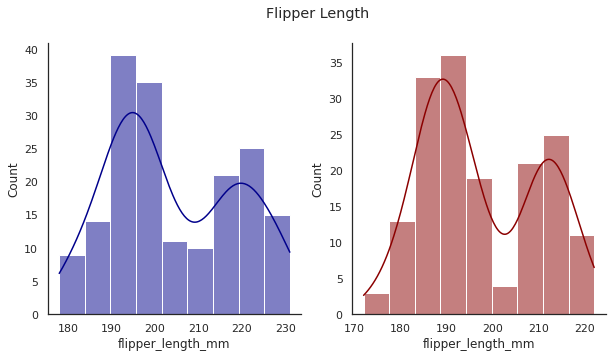

In [13]:
#HISTOGRAM comparison- 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
sns.histplot(ax = ax[0], x = "flipper_length_mm", kde = True, color = "darkblue", data = data[(data.sex == "Male")])
sns.histplot(ax = ax[1], x = "flipper_length_mm", kde = True, color = "darkred", data = data[(data.sex == "Female")])
plt.suptitle("Flipper Length")
plt.show()

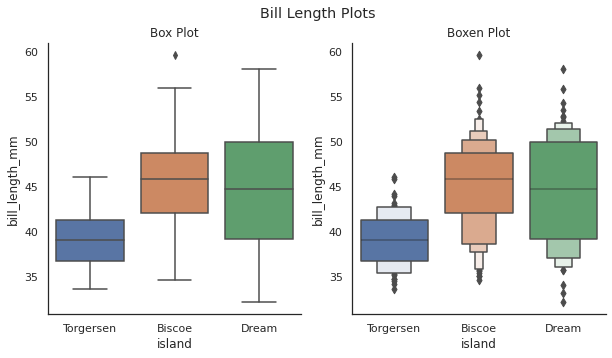

In [14]:
#BOX comparison-
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
#BOX
viz_box = sns.boxplot(data = data, x = "island", y = "bill_length_mm", ax = ax[0])
#BOXEN
viz_boxen = sns.boxenplot(data = data, x = "island", y = "bill_length_mm", ax = ax[1])
ax[0].set_title("Box Plot")
ax[1].set_title("Boxen Plot")
plt.suptitle("Bill Length Plots")
plt.show()

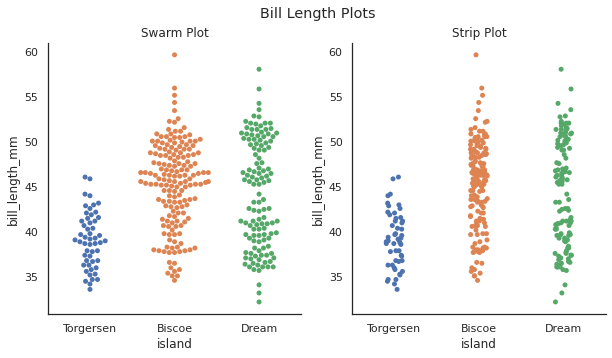

In [15]:
#SWARM - STRIP comparison-
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
#SWARM
viz_swarm = sns.swarmplot(data = data, x = "island", y = "bill_length_mm",  ax = ax[0])
#STRIP
viz_strip = sns.stripplot(data = data, x = "island", y = "bill_length_mm",  ax = ax[1])
ax[0].set_title("Swarm Plot")
ax[1].set_title("Strip Plot")
plt.suptitle("Bill Length Plots")
plt.show()

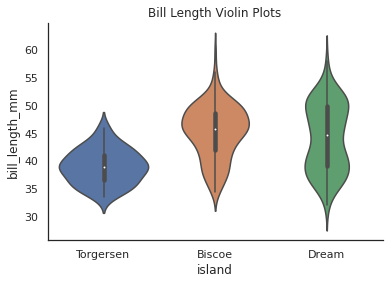

In [16]:
#VIOLIN
viz_violin = sns.violinplot(data = data, x = "island", y = "bill_length_mm")
plt.title("Bill Length Violin Plots")
plt.show()

Text(0.5, 0.98, 'Flipper Length Ridgeline Plot')

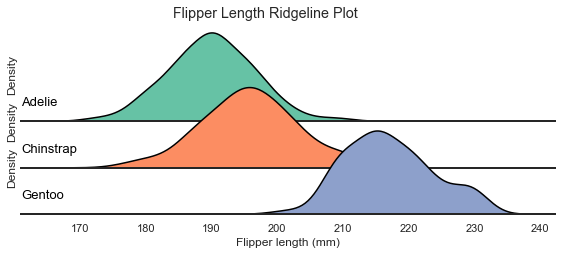

In [17]:
#RIDGELINE
species = ['Adelie', 'Chinstrap', 'Gentoo']
df_filtered = data[data['species'].isin(species)]
df_filtered
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df_filtered, palette=palette, row="species", hue="species", aspect=7, height=1.2)
g.map_dataframe(sns.kdeplot, x="flipper_length_mm", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="flipper_length_mm", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "species")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Flipper length (mm)")
g.despine( left=True)
plt.suptitle('Flipper Length Ridgeline Plot', y=0.98)

In [19]:
#SUNBURST
import plotly.express as px
import plotly.graph_objects as go
fig = px.sunburst(data,
                  path=["sex", "island", "species"],
                  values='bill_length_mm',
                  title="Penguin Species by Gender & Island (Plotly Express)",
                  width=450, height=450)
fig.show()

In [20]:
#In case you need to group data for a viz
data_group = data.groupby('species').count()
data_group = data_group.reset_index()
data_group.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,152,152,152,152,152,152
1,Chinstrap,68,68,68,68,68,68
2,Gentoo,124,124,124,124,124,124


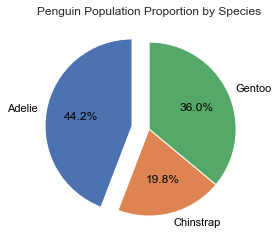

In [21]:
#PIEPLOT
data_group = data.groupby('species').count()
data_group = data_group.reset_index()
values = data_group['island']
labels = data_group['species']
plt.pie(values, labels = labels, radius = 1, startangle = 90, 
    explode = [0.2, 0.0, 0.0], textprops=dict(color="black"), autopct='%1.1f%%')
plt.title("Penguin Population Proportion by Species")
plt.show()

"\nsns.boxplot(x='flipper_length_mm', y='species', data=data, width=0.25, showfliers=False, showmeans=True, \n            meanprops=dict(marker='o', markerfacecolor='darkorange', markersize=10, zorder=3),\n            boxprops=dict(facecolor=(0,0,0,0), linewidth=3, zorder=3), whiskerprops=dict(linewidth=3), \n            capprops=dict(linewidth=3), medianprops=dict(linewidth=3))\nplt.legend(frameon=False, fontsize=15, loc='upper right')\nadd_cosmetics()\n"

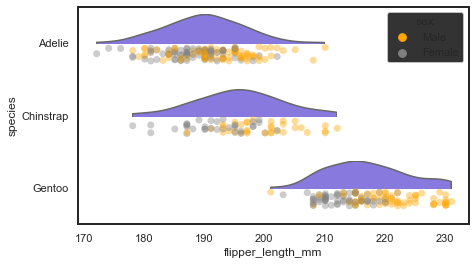

In [23]:
#RAINCLOUD
def add_cosmetics(title='Penguin Flipper Length Raincloud Plot', xlabel='Flipper length', ylabel='Species'):
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.despine()
plt.figure(figsize=(7, 4))
# Create violin plots without mini-boxplots inside.
ax = sns.violinplot(x='flipper_length_mm', y='species', data=data, color='mediumslateblue', cut=0, inner=None)
# Clip the lower half of each violin.
for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2, transform=ax.transData))
# Create strip plots with partially transparent points of different colors depending on the group.
num_items = len(ax.collections)
sns.stripplot(x='flipper_length_mm', y='species', hue='sex', data=data, palette=['orange', 'gray'], alpha=0.4, size=7)
# Shift each strip plot strictly below the correponding volin.
for item in ax.collections[num_items:]: item.set_offsets(item.get_offsets() + 0.15)
# Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
'''
sns.boxplot(x='flipper_length_mm', y='species', data=data, width=0.25, showfliers=False, showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='darkorange', markersize=10, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), linewidth=3, zorder=3), whiskerprops=dict(linewidth=3), 
            capprops=dict(linewidth=3), medianprops=dict(linewidth=3))
plt.legend(frameon=False, fontsize=15, loc='upper right')
add_cosmetics()
'''

In [24]:
#TREEMAP
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
data2 = {'labels': ["A","B","C","D","E","F","G"],
        'values':[10,20,25,35,10,25,45]}
df = pd.DataFrame(data2)
fig = px.treemap(df, path=['labels'],values='values', width=400, height=200, title = "Random Treemap: Color = Relative Value")
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25))
fig.show()

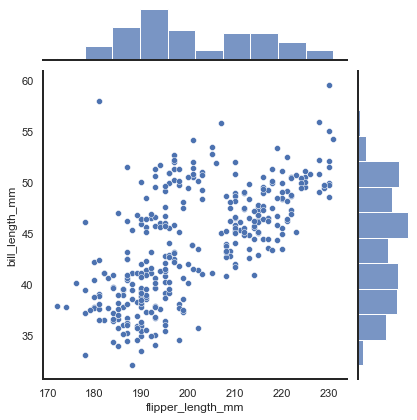

In [25]:
sns.jointplot(data=data, x = "flipper_length_mm", y = "bill_length_mm")


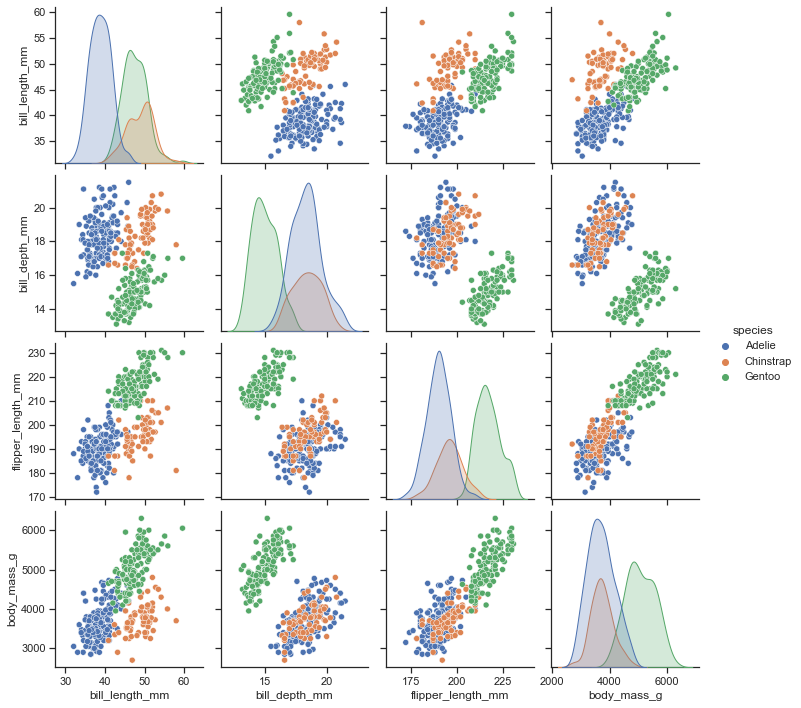

In [26]:
#PAIRPLOT
sns.set_theme(style="ticks")
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_length_mm'>

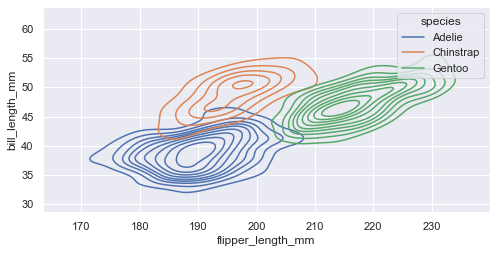

In [27]:
#KDE PLOT
sns.set_theme(style="darkgrid")
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
# Draw a contour plot to represent each bivariate density
sns.kdeplot(data=data, x="flipper_length_mm", y="bill_length_mm", hue="species", thresh=.1)